In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
sns.set_context("talk", font_scale = 1.4)

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [71]:
a = 2
b = 2
X = np.linspace(0,1,4)[:,None]
X_prime = np.linspace(0,1,10)[:,None]
Y = scipy.stats.beta.pdf(X, a, b)

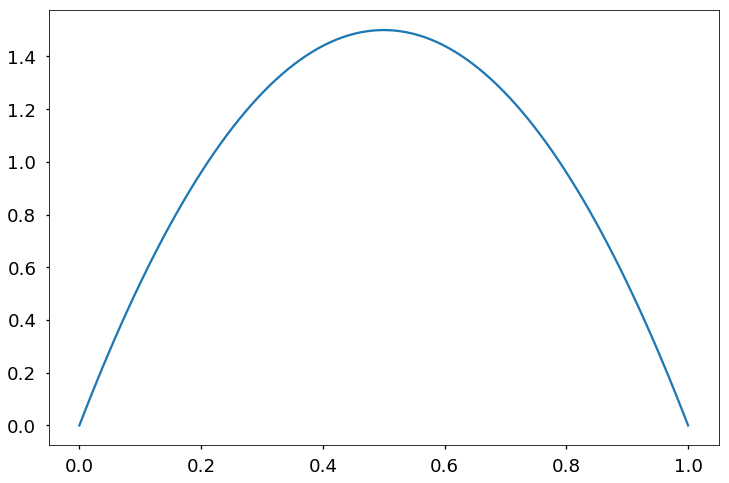

In [72]:
Xplot = np.linspace(0,1,100)[:,None]
Yplot = scipy.stats.beta.pdf(Xplot, a, b)
plt.figure(figsize = (12,8))
plt.plot(Xplot, Yplot)

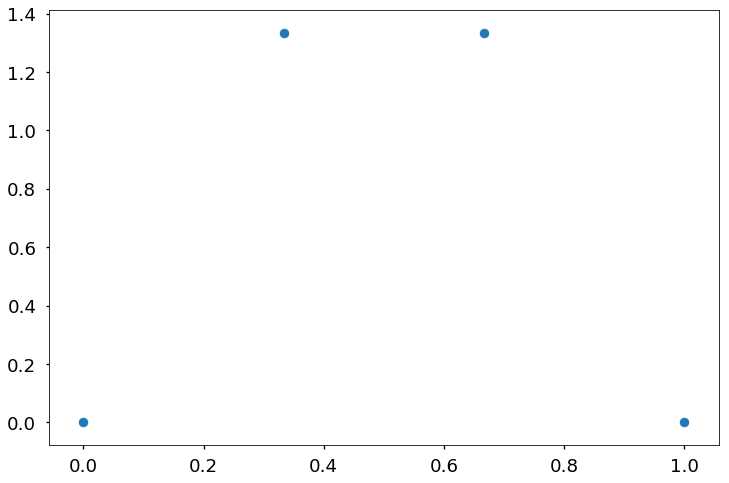

In [73]:
plt.figure(figsize = (12,8))
plt.scatter(X, Y)

In [74]:
import sys
sys.path.append('../')
from GPFlowUnimodal.ker_w_der import ExtendRBF1D
from GPFlowUnimodal.unimodal_gpmc import UnimodalGPMC

In [75]:
m = UnimodalGPMC(X, Y, X_prime)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [76]:
m

Name,values,prior,constraint
unimodal_model.Vf,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.Vg,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.kern_f.lengthscale,[1.],None,+ve
unimodal_model.kern_f.signal_variance,[1.],None,+ve
unimodal_model.kern_g.lengthscale,[1.],None,+ve
unimodal_model.kern_g.signal_variance,[1.],None,+ve
unimodal_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [77]:
m.kern_f.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_f.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m.kern_g.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_g.signal_variance.prior = gpflow.priors.Gamma(1.,1.)

In [78]:
m.optimize(maxiter=150) # start near MAP

      fun: array([118.02833525])
 hess_inv: <38x38 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.84793205e-01, -1.10055477e+01,  1.69414165e+01,  6.00191840e+00,
        1.83786465e-03, -1.48783987e-03, -1.19711047e-03, -6.07634085e-04,
       -1.99068068e-04,  1.00722963e-04,  2.94973257e-04,  6.56823531e-04,
        7.00015016e-04,  2.24463418e-04, -9.11693575e-01,  1.46529643e+00,
        1.01848564e+00,  3.43333988e-01,  2.52058314e-01,  1.19479385e-01,
        5.81994869e-02,  2.88262820e-02,  1.12655469e-02,  3.08953536e-03,
        4.56682403e-05,  1.56487001e-05,  2.50923138e-05,  1.17443934e-05,
       -7.67312726e-06, -1.55809017e-05, -2.31991883e-06,  2.86579506e-05,
        4.28447268e-05,  1.63154966e-05,  1.08602486e+01, -2.31719598e-01,
        2.63254551e-01,  2.61868690e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 37
      nit: 9
   status: 0
  success: True
        x: array([ 6.44382783e-01,  3.12530967e-01,  9.16267847e

In [79]:
samples = m.sample(2000, Lmax = 40, epsilon = 0.005, thin = 3, burn = 200, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  72.0 %
Iteration:  200 	 Acc Rate:  86.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  76.0 %
Iteration:  200 	 Acc Rate:  85.0 %
Iteration:  300 	 Acc Rate:  84.0 %
Iteration:  400 	 Acc Rate:  88.0 %
Iteration:  500 	 Acc Rate:  86.0 %
Iteration:  600 	 Acc Rate:  78.0 %
Iteration:  700 	 Acc Rate:  93.0 %
Iteration:  800 	 Acc Rate:  93.0 %
Iteration:  900 	 Acc Rate:  94.0 %
Iteration:  1000 	 Acc Rate:  92.0 %
Iteration:  1100 	 Acc Rate:  83.0 %
Iteration:  1200 	 Acc Rate:  82.0 %
Iteration:  1300 	 Acc Rate:  82.0 %
Iteration:  1400 	 Acc Rate:  50.0 %
Iteration:  1500 	 Acc Rate:  92.0 %
Iteration:  1600 	 Acc Rate:  84.0 %
Iteration:  1700 	 Acc Rate:  84.0 %
Iteration:  1800 	 Acc Rate:  73.0 %
Iteration:  1900 	 Acc Rate:  73.0 %
Iteration:  2000 	 Acc Rate:  82.0 %
Iteration:  2100 	 Acc Rate:  91.0 %
Iteration:  2200 	 Acc Rate:  95.0 %
Iteration:  2300 	 Acc Rate:  98.0 %
Iteration:  2400 	 Acc Rate:  96.0 %
I

In [80]:
#plt.figure(figsize=(16, 4))
#plt.plot(samples)

In [81]:
sample_df = m.get_samples_df(samples)
sample_df.head()

,unimodal_model.Vf,unimodal_model.Vg,unimodal_model.kern_f.lengthscale,unimodal_model.kern_f.signal_variance,unimodal_model.kern_g.lengthscale,unimodal_model.kern_g.signal_variance,unimodal_model.likelihood.noise_variance
0,"[[0.15575279746728618], [1.120981119657564], [...","[[0.9634328306850741], [-1.0829546606244056], ...",[0.34435074249712094],[1.8199273276531762],[0.6565089155320653],[1.3838653202074438],[0.01]
1,"[[0.05610135739260359], [1.1852200363685115], ...","[[1.4059447560367901], [-0.9606831816404288], ...",[0.3612856078160014],[1.698215422622389],[0.7049929422175671],[1.2802851873946184],[0.01]
2,"[[0.05610135739260359], [1.1852200363685115], ...","[[1.4059447560367901], [-0.9606831816404288], ...",[0.3612856078160014],[1.698215422622389],[0.7049929422175671],[1.2802851873946184],[0.01]
3,"[[-0.10897830211430151], [1.2857405997125193],...","[[1.3316857143782161], [-0.6415857642467468], ...",[0.33575954463378127],[2.0169443246465275],[0.6913750062106524],[1.1244259129492855],[0.01]
4,"[[0.052436547509701725], [1.2287081694238153],...","[[1.1411226867192503], [-0.4704434877678319], ...",[0.3646952282729078],[1.9737474596511808],[0.793162889965909],[1.025553511028344],[0.01]


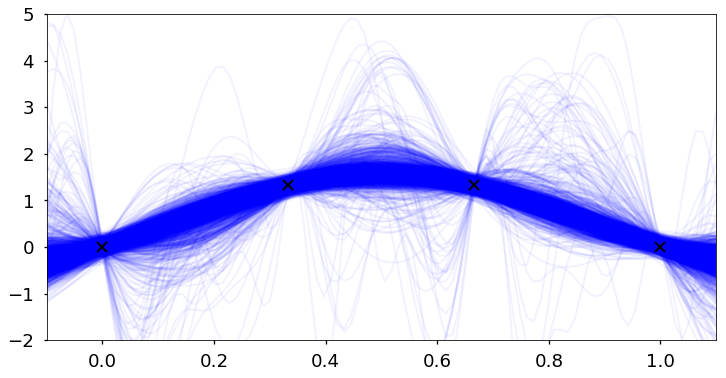

In [82]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 20)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-2, 5)

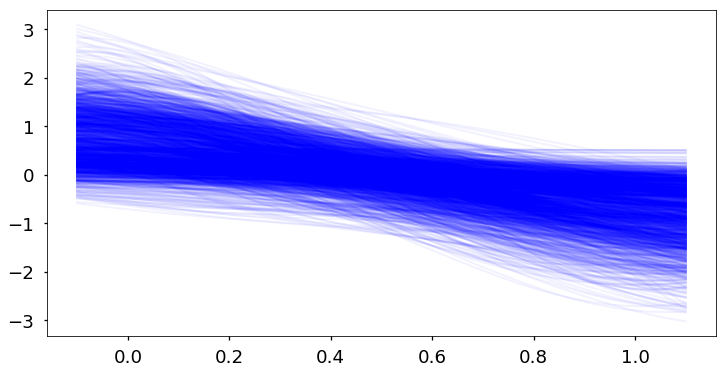

In [83]:
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, g[0,:,:], 'b', lw=2, alpha = 0.05)

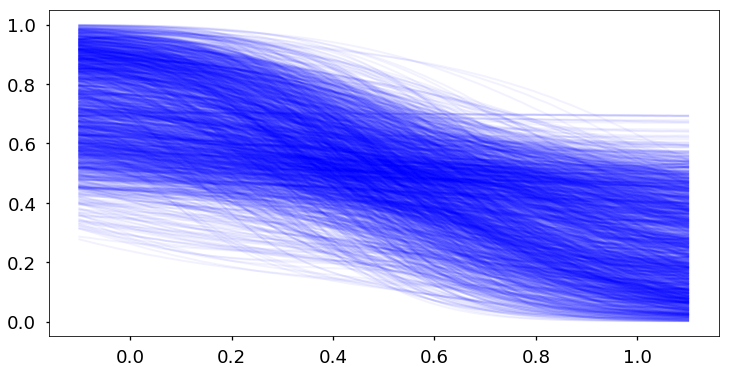

In [84]:
from scipy.stats import norm
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 1)
    plt.plot(xx, norm.cdf(g[0,:,:]), 'b', lw=2, alpha = 0.05)

In [85]:
meanmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
varmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean, v = m.predict_f(xx)
    var = v[:,:,0]
    meanmat[i,:] = mean[:,0]
    varmat[i,:] = np.diag(var)

In [86]:
def visualize_utility(Xgrid, Mgrid, Vargrid):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Stdgrid = np.sqrt(Vargrid)
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    #plt.figure(figsize=(12,8))
    #plt.plot(Xgrid[:,0], lower, 'g')
    #plt.plot(Xgrid[:,0], upper, 'r')
    #plt.plot(Xgrid[:,0], Mgrid, 'b')
    
    line, = plt.plot(Xgrid, Mgrid, lw = 2)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = line.get_color(), alpha = 0.25)
    plt.xlabel('Temperature degC')
    plt.ylabel('Utility')
    plt.title('Utility at different temp values')
    return

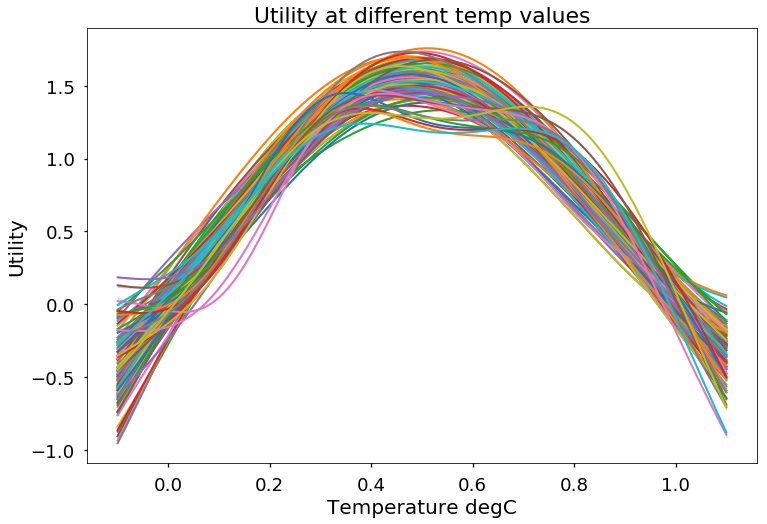

In [87]:
plt.figure(figsize=(12,8))
for i in xrange(180,300):
    #plt.figure()
    visualize_utility(xx, meanmat[i,:], varmat[i,:])

In [65]:
g[0,:,:].shape

(100, 1)

In [66]:
g.shape

(1, 100, 1)

In [67]:
m.set_state(samples[i,:])

122

In [68]:
samples.shape

(2000, 122)

In [69]:
samples[0]

array([ 0.08887716,  2.06435691,  0.48480046, -0.82798908, -0.26937308,
       -0.5238198 , -1.29568199,  2.00678114, -1.39229296, -0.68018754,
       -0.27007767, -0.63622945, -1.01070867,  0.33487567, -0.29758956,
       -0.13235982, -0.84004636,  0.36886374,  0.19515577,  0.8989959 ,
       -0.44962814, -0.84538412,  1.3174433 ,  0.43616448,  0.10182477,
        0.4080414 ,  1.43253653, -0.57473739, -1.47891814, -0.45763397,
       -1.21713063,  0.80066376,  0.60096627,  0.04536035, -0.81826734,
        0.1825064 ,  0.09340757, -0.25183244, -0.54294724, -0.24323325,
        1.78015353,  0.93877867,  1.77942924, -1.38104875, -0.94932558,
        1.35878779, -0.49301767, -0.89171561, -1.86963068, -0.41938845,
       -1.53270061, -0.32344695, -0.65158008, -1.61363556,  0.61750488,
       -1.1235099 , -1.35182183, -2.21534435, -2.0069561 , -0.80235664,
        1.02011384,  0.13550867,  0.90215718, -1.03928466, -0.09840778,
       -2.0755667 , -1.59425211, -1.56805931,  0.68619784,  0.10

In [70]:
samples[3]

array([-0.0931303 ,  1.95842329,  0.07292559, -0.84130981,  0.27364908,
       -0.12502661, -1.82999446,  2.3535023 , -0.84491053, -0.47495035,
       -0.58163355, -0.67806217, -0.57664185,  0.56414792,  0.0367227 ,
       -0.34120023, -0.4337703 ,  0.78043092, -0.55329862,  0.64021596,
       -0.66882865, -1.09427035,  1.3783804 ,  0.70759698,  0.20613709,
        0.37366575,  0.86548904, -0.76950933, -1.78182721, -0.82887188,
       -1.05732102,  0.82384373,  0.8004916 ,  0.28715172, -0.79897281,
        0.23580082,  0.1880939 , -0.30437913,  0.10255075, -0.49125324,
        2.63942871,  0.49801434,  1.67764455, -1.41615063, -1.01032451,
        1.55651699,  0.18740175, -0.27835764, -1.62502262, -0.74069064,
       -1.45568193, -0.30790552, -1.24500428, -1.44093526,  0.39476004,
       -0.45848499, -2.00033759, -2.22169896, -2.31274742, -0.99326661,
        0.89728402, -0.47876361,  1.18165087, -0.71151172, -0.32727663,
       -1.68954873, -1.43418502, -1.63615806,  0.54744677,  0.50